In [32]:
from digits import plate_segmentation
import cv2

In [33]:
import matplotlib.pyplot as plt


In [34]:
img_file_path = 'demo/plates/41.jpg'
img = cv2.imread(img_file_path)
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

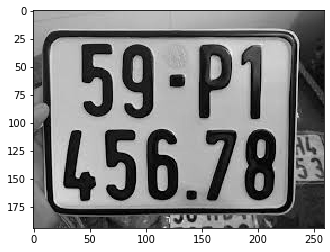

In [35]:
digits = plate_segmentation(img_file_path)
plt.imshow(imgray,'gray')
plt.show()

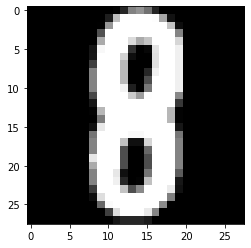

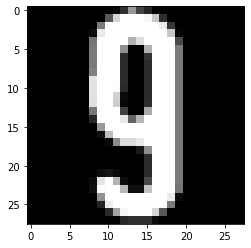

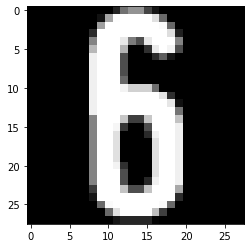

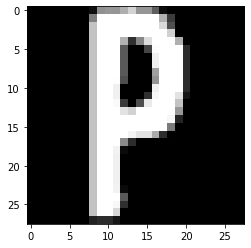

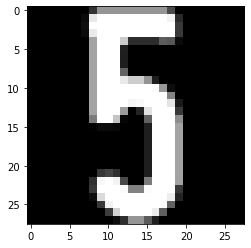

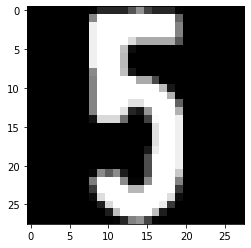

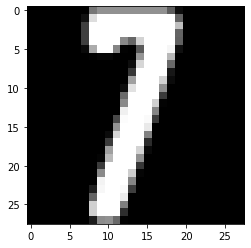

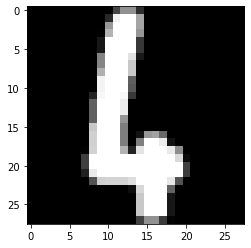

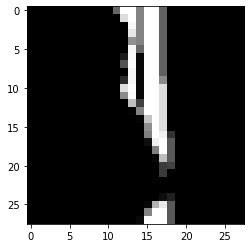

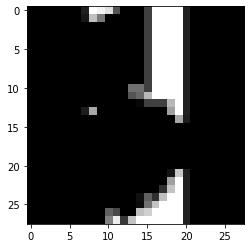

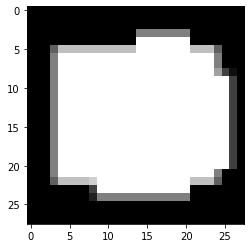

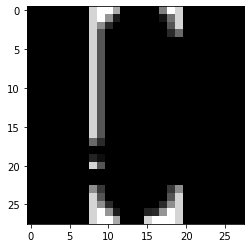

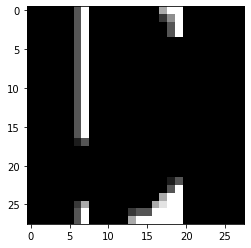

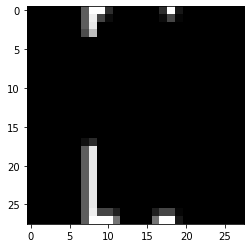

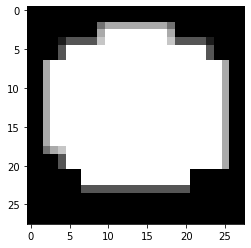

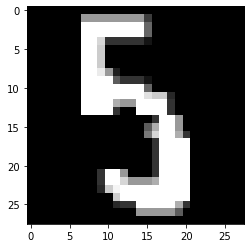

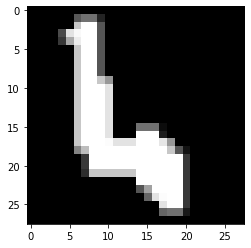

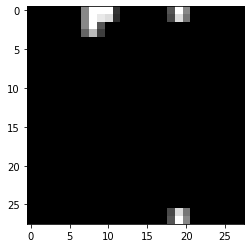

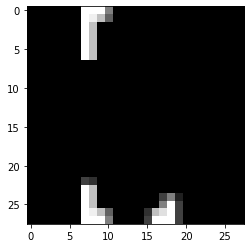

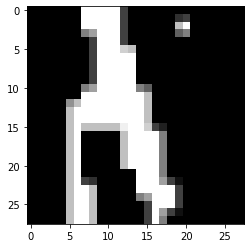

In [36]:

for digit in digits:
    plt.imshow(digit,'gray')
    plt.show()

In [7]:
def get_contour_precedence(contour, cols):
    tolerance_factor = 10
    origin = cv2.boundingRect(contour)
    return ((origin[1] // tolerance_factor) * tolerance_factor) * cols + origin[0]



In [8]:
def square(img):
    """
    This function resize non square image to square one (height == width)
    :param img: input image as numpy array
    :return: numpy array
    """

    # image after making height equal to width
    squared_image = img

    # Get image height and width
    h = img.shape[0]
    w = img.shape[1]

    # In case height superior than width
    if h > w:
        diff = h-w
        if diff % 2 == 0:
            x1 = np.zeros(shape=(h, diff//2))
            x2 = x1
        else:
            x1 = np.zeros(shape=(h, diff//2))
            x2 = np.zeros(shape=(h, (diff//2)+1))

        squared_image = np.concatenate((x1, img, x2), axis=1)

    # In case height inferior than width
    if h < w:
        diff = w-h
        if diff % 2 == 0:
            x1 = np.zeros(shape=(diff//2, w))
            x2 = x1
        else:
            x1 = np.zeros(shape=(diff//2, w))
            x2 = np.zeros(shape=((diff//2)+1, w))

        squared_image = np.concatenate((x1, img, x2), axis=0)

    return squared_image


In [9]:
def sort(vector):
    sort = True
    while (sort == True):

        sort = False
        for i in range(len(vector) - 1):
            x_1 = vector[i][0]
            y_1 = vector[i][1]

            for j in range(i + 1, len(vector)):

                x_2 = vector[j][0]
                y_2 = vector[j][1]

                if (x_1 >= x_2 and y_2 >= y_1):
                    tmp = vector[i]
                    vector[i] = vector[j]
                    vector[j] = tmp
                    sort = True

                elif (x_1 < x_2 and y_2 > y_1):
                    tmp = vector[i]
                    vector[i] = vector[j]
                    vector[j] = tmp
                    sort = True
    return vector

In [30]:
 # global thresholding
ret1,th1 = cv2.threshold(imgray,127,255,cv2.THRESH_BINARY)

    # Otsu's thresholding
ret2,th2 = cv2.threshold(imgray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    # Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(imgray,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

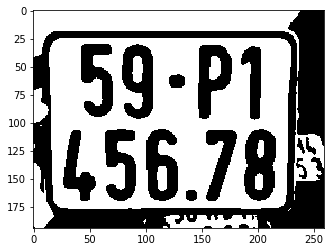

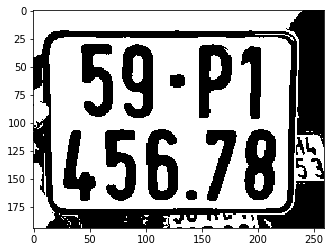

In [31]:
plt.imshow(th3,cmap="gray")
plt.show()
plt.imshow(th2,cmap="gray")
plt.show()